<font size="10">**LAPORAN PRAKTIKUM MSD I**</font>

<font size="6">**IMPORT & PREPROCESSING**</font>

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib  inline

In [121]:
data = "C:/Users/LENOVO/Downloads/diamonds.csv"
df = pd.read_csv(data)
df.head()

,carat,depth,table,price,quality
0,0.23,61.5,55.0,326,Ideal
1,0.21,59.8,61.0,326,Premium
2,0.23,56.9,65.0,327,Good
3,0.29,62.4,58.0,334,Premium
4,0.31,63.3,58.0,335,Good


In [122]:
kosong = df.notnull()
print(kosong)

       carat  depth  table  price  quality
0       True   True   True   True     True
1       True   True   True   True     True
2       True   True   True   True     True
3       True   True   True   True     True
4       True   True   True   True     True
...      ...    ...    ...    ...      ...
53935   True   True   True   True     True
53936   True   True   True   True     True
53937   True   True   True   True     True
53938   True   True   True   True     True
53939   True   True   True   True     True

[53940 rows x 5 columns]


In [123]:
quality_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
df['quality_rank'] = df['quality'].replace(quality_mapping)
df.head()

,carat,depth,table,price,quality,quality_rank
0,0.23,61.5,55.0,326,Ideal,5
1,0.21,59.8,61.0,326,Premium,4
2,0.23,56.9,65.0,327,Good,2
3,0.29,62.4,58.0,334,Premium,4
4,0.31,63.3,58.0,335,Good,2


<font size="6">**STATISTIKA DESKRIPTIF**</font>

In [124]:
df.describe()

,carat,depth,table,price,quality_rank
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,3.904097
std,0.474011,1.432621,2.234491,3989.439738,1.116600
min,0.200000,43.000000,43.000000,326.000000,1.000000
25%,0.400000,61.000000,56.000000,950.000000,3.000000
50%,0.700000,61.800000,57.000000,2401.000000,4.000000
75%,1.040000,62.500000,59.000000,5324.250000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,5.000000


In [125]:
modus = df.mode()

print('Modus carat adalah   :', modus.iloc[0]['carat'])
print('Modus depth adalah   :', modus.iloc[0]['depth'])
print('Modus table adalah   :', modus.iloc[0]['table'])
print('Modus price adalah   :', modus.iloc[0]['price'])
print('Modus quality adalah :', modus.iloc[0]['quality'])

Modus carat adalah   : 0.3
Modus depth adalah   : 62.0
Modus table adalah   : 56.0
Modus price adalah   : 605
Modus quality adalah : Ideal


<font size="6">**VISUALISASI**</font>

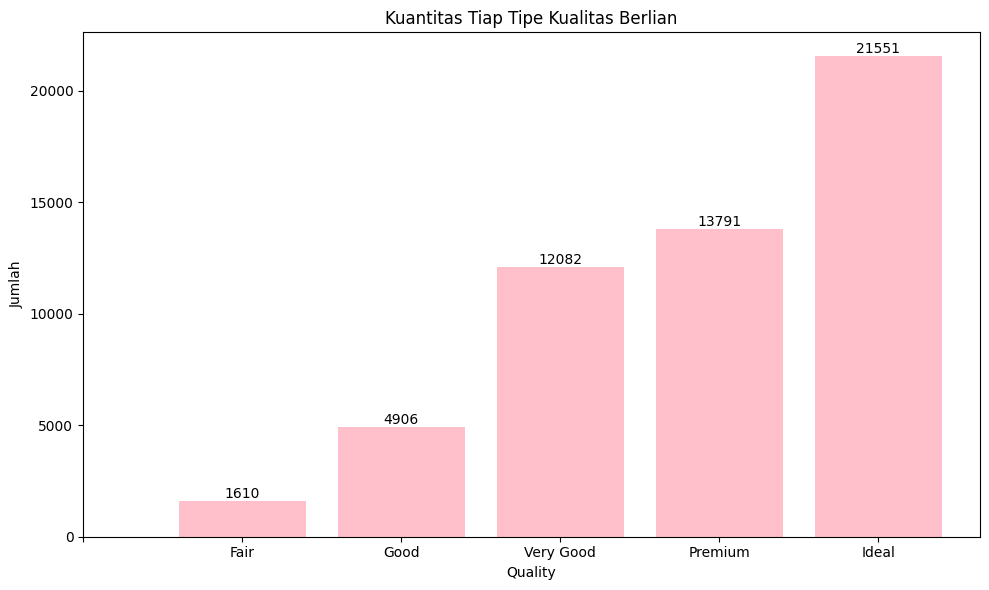

In [187]:
quality_counts = df['quality_rank'].value_counts()
quality_counts = quality_counts.sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(quality_counts.index, quality_counts.values, color='pink')

plt.xlabel('Quality')
plt.ylabel('Jumlah')
plt.title('Kuantitas Tiap Tipe Kualitas Berlian')

for bar, count in zip(bars, quality_counts):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(count), ha='center', va='bottom', fontsize=10)

labels = ['','Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
plt.xticks(range(len(labels)), labels)
plt.tight_layout()
plt.show()

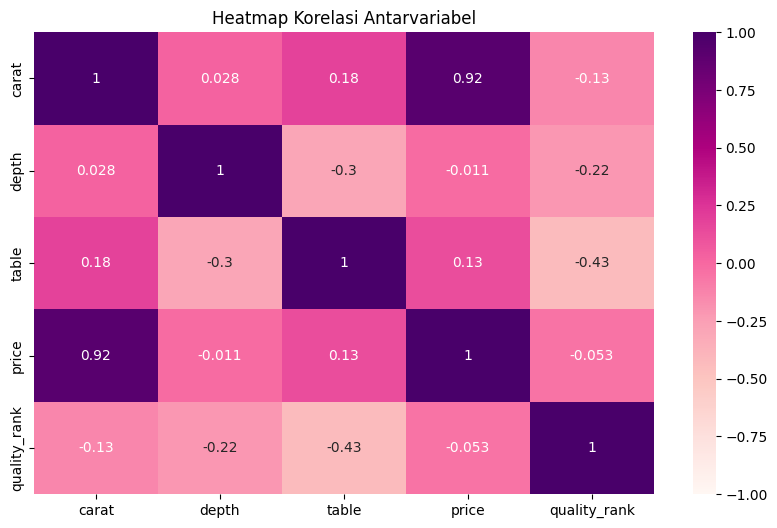

In [127]:
df_numerik = df.drop(columns=['quality'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_numerik.corr(), annot=True, cmap='RdPu', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Antarvariabel')
plt.show()

<font size="6">**DEEP LEARNING (JST)**</font>

In [157]:
# Import library
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

In [158]:
#Data
X = df[['carat', 'depth', 'table', 'price']]
Y = df['quality']

In [159]:
#Mengidentifikasikan variabel respon
encoder = LabelEncoder()
y = encoder.fit_transform(Y)

In [178]:
#Membagi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
#Standarisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [192]:
#Model Multilayer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10), max_iter=1000, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10), max_iter=1000,
              random_state=42)

In [195]:
#Menampilkan bobot
print("\nWeights and biases of the MLP:")

for i, (coef, intercept) in enumerate(zip(mlp.coefs_, mlp.intercepts_)):
    print(f"\nLayer {i + 1}")
    print(f"Weights: \n{coef}")
    print(f"Biases: \n{intercept}")


Weights and biases of the MLP:

Layer 1
Weights: 
[[ 5.34618705e-01  6.01973684e-02  1.30305363e-01 -2.02526492e-01
  -2.15077199e-01  3.92054327e-04 -1.50197732e+00  8.53817297e-01
  -2.20975463e-01  5.48939877e-01]
 [-1.02724599e-01  1.36477526e+00  8.06825390e-02 -5.04510252e-01
  -8.27091550e-01 -1.21116982e-01 -1.83799433e-01  1.66298216e-01
   8.68433085e-02 -4.99625027e-01]
 [ 1.66322471e-01 -2.14159276e-01 -7.36616925e-01 -5.03053477e-01
  -4.90089760e-01  1.33631692e+00 -3.18497874e-01 -2.34165755e-01
  -3.22082811e-02 -5.82569943e-01]
 [-4.87707535e-01 -1.14089649e-01 -7.48349120e-02  4.63964808e-01
   2.92486526e-01  7.87409418e-03 -2.96916756e-01 -7.34795251e-01
   5.96202602e-01 -5.85945794e-01]]
Biases: 
[-0.18307533 -0.72205059 -0.52900163  1.02356268 -0.6164361   0.28603784
 -0.84879609 -0.27143457  0.13528769  0.29267289]

Layer 2
Weights: 
[[ 8.94351222e-01  2.58955413e-01  7.85188198e-02  7.78125337e-01
  -3.07501185e-01  7.45017796e-01 -1.33749038e-01 -2.55705405e-

In [198]:
#Menampilkan persamaan Multilayer Perceptron
def display_neuron_equations(mlp, feature_names):
    for layer_idx, (coef, intercept) in enumerate(zip(mlp.coefs_, mlp.intercepts_)):
        print(f"\nLayer {layer_idx + 1} Neuron Equations:")
        for neuron_idx, (weights, bias) in enumerate(zip(coef.T, intercept)):
            equation = " + ".join(f"{weight:.4f}*{name}" for weight, name in zip(weights, feature_names))
            equation = f"Neuron {neuron_idx}: {equation} + {bias:.4f}"
            print(equation)

feature_names = df[['carat', 'depth', 'table', 'price']]
display_neuron_equations(mlp, feature_names)


Layer 1 Neuron Equations:
Neuron 0: 0.5346*carat + -0.1027*depth + 0.1663*table + -0.4877*price + -0.1831
Neuron 1: 0.0602*carat + 1.3648*depth + -0.2142*table + -0.1141*price + -0.7221
Neuron 2: 0.1303*carat + 0.0807*depth + -0.7366*table + -0.0748*price + -0.5290
Neuron 3: -0.2025*carat + -0.5045*depth + -0.5031*table + 0.4640*price + 1.0236
Neuron 4: -0.2151*carat + -0.8271*depth + -0.4901*table + 0.2925*price + -0.6164
Neuron 5: 0.0004*carat + -0.1211*depth + 1.3363*table + 0.0079*price + 0.2860
Neuron 6: -1.5020*carat + -0.1838*depth + -0.3185*table + -0.2969*price + -0.8488
Neuron 7: 0.8538*carat + 0.1663*depth + -0.2342*table + -0.7348*price + -0.2714
Neuron 8: -0.2210*carat + 0.0868*depth + -0.0322*table + 0.5962*price + 0.1353
Neuron 9: 0.5489*carat + -0.4996*depth + -0.5826*table + -0.5859*price + 0.2927

Layer 2 Neuron Equations:
Neuron 0: 0.8944*carat + -0.0411*depth + 0.0911*table + 0.4387*price + 1.1184
Neuron 1: 0.2590*carat + 0.3678*depth + -0.9057*table + 0.4257*price

In [191]:
#Evaluasi model
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy : {accuracy*100:.2f}%\n')
target = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
print(classification_report(y_test, y_pred, target_names = target))

Model Accuracy : 72.57%

              precision    recall  f1-score   support

        Fair       0.89      0.87      0.88       335
        Good       0.74      0.56      0.64      1004
   Very Good       0.59      0.30      0.40      2382
     Premium       0.64      0.83      0.72      2775
       Ideal       0.81      0.92      0.86      4292

    accuracy                           0.73     10788
   macro avg       0.74      0.70      0.70     10788
weighted avg       0.71      0.73      0.70     10788

